In [214]:
import numpy as np

In [215]:
length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [216]:
import matplotlib.pyplot as plt

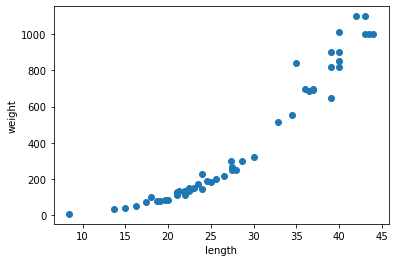

In [217]:
plt.scatter(length,weight)
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

### 값을 예측.... 회귀
### 훈련세트 준비

In [218]:
from sklearn.model_selection import train_test_split

In [219]:
train_input,test_input,train_target,test_target = train_test_split(length,weight,random_state=42)

In [220]:
train_input.shape, test_input.shape

((42,), (14,))

In [221]:
test = np.array([1,2,3,4,5])
test = test.reshape(-1,1)
test.shape

(5, 1)

In [222]:
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

# 훈련 모델   회귀
### fit
### score - 점수
### predict

In [223]:
from sklearn.neighbors import KNeighborsRegressor   # 예측

In [224]:
knr =  KNeighborsRegressor()

In [225]:
knr.fit(train_input, train_target)

KNeighborsRegressor()

In [226]:
knr.score(test_input,test_target)

0.992809406101064

### 학습용데이터는 2D  array 형태가 되어야함  reshape(-1,1)

### 평가 방법 : 결정계수 R**2
### 평균제곱오차
## 1-( sum((타킷-예측)**2) / sum((타깃 - 평균)**2) )

In [227]:
from sklearn.metrics import mean_absolute_error

### mean_absolute_error(실제값, 예측한 값)

In [228]:
test_predict =  knr.predict(test_input)

In [229]:
mae =  mean_absolute_error(test_target, test_predict)
mae

19.157142857142862

In [230]:
## 하이퍼 파마메터 튜닝  - 머신러닝에서 파라메터의 최적의 값을 찾는 과정

In [231]:
mae_list = []
parameters = {
    "random_state" : list(range(1000))
}
for i in parameters["random_state"]:
#     print(parameters["random_state"][i])
    train_input,test_input,train_target,test_target = train_test_split(length,weight,random_state=parameters["random_state"][i])
    knr = KNeighborsRegressor()
    train_input = train_input.reshape(-1,1)
    test_input = test_input.reshape(-1,1)
    knr.fit(train_input,train_target)
    test_predict =  knr.predict(test_input)
    # 평균제곱오차
    mae_list.append( mean_absolute_error(test_target,test_predict) )

#mae_list    

### 최소값 찾고.. 최소값에 해당하는 index를 찾아서. 그 index를 가지고  -->find_index
### parameters["random_state"][find_index]
### 최적의 random_state 값을 찾았음

In [232]:
random_state_min = np.min(mae_list)
random_state_min

10.857142857142858

In [233]:
find_index = mae_list.index(random_state_min)

In [234]:
parameters["random_state"][find_index]

131

# 과적합(overfit) = 과대적합 + 과소적합

In [235]:
knr = KNeighborsRegressor()
x = np.arange(5,45).reshape(-1,1)

### n_neightbors 의 갯수를 1 ,5, 10 비교해 보자

In [266]:
temp = test_input  # np array 2차원을 복사
temp = temp.reshape(-1) # 1차원 리스트로 변환
temp.sort()             # 1차원 리스트를 오름차순으로 정렬
temp = temp.reshape(-1,1)  # 정렬된 데이터를 2차원 배열로 변경
# temp                      # 데이터 확인

# np.sort(test_input,axis=0)
# test_input

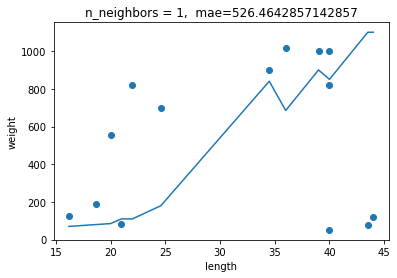

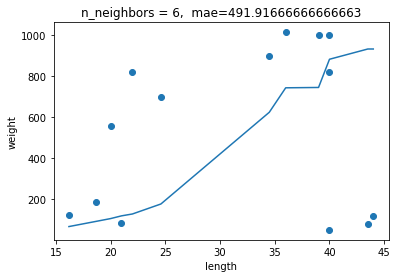

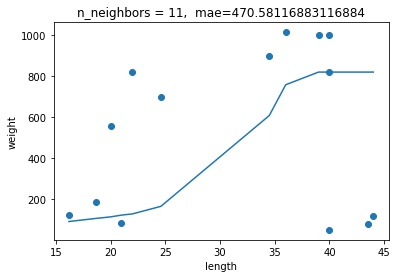

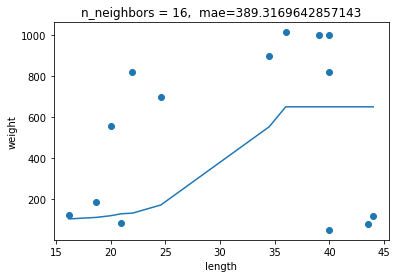

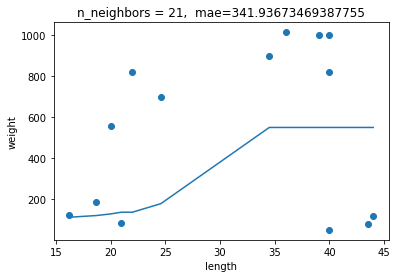

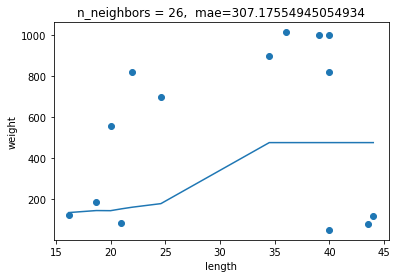

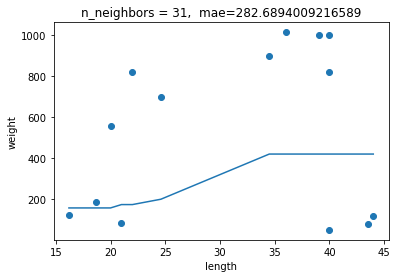

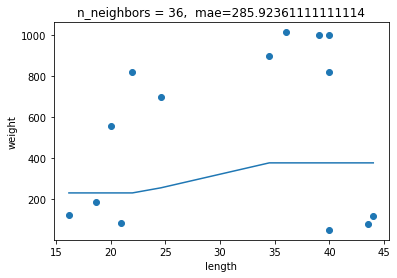

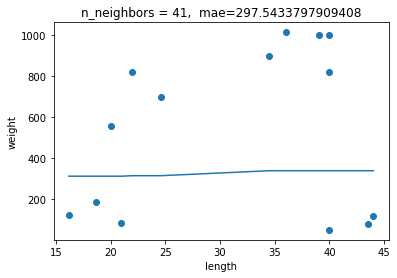

In [268]:
for i in range(1,45,5):
    knr.n_neighbors = i
    knr.fit(train_input,train_target)
    prediction = knr.predict(temp)  # 테스트 데이터로 예측
    plt.scatter(test_input,test_target)   # 실제 테스트 데이터를 좌표에 출력
    plt.plot(temp,prediction)          # 테스트데이터로 예측 한 값들을 선으로 표시
    mae = mean_absolute_error(temp, prediction)
    plt.title(f"n_neighbors = {i},  mae={mae}")
    plt.xlabel("length")
    plt.ylabel("weight")
    plt.show()